<a href="https://colab.research.google.com/github/ptizzza/HSE_AffectiveComputing/blob/master/NN_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_circles

In [ ]:
from numpy import where
from matplotlib import pyplot
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

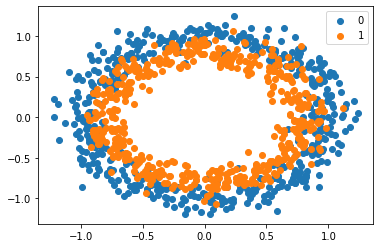

In [ ]:
for i in range(2):
    samples_ix = where(y == i)
    pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))
pyplot.legend()
pyplot.show()

In [ ]:
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

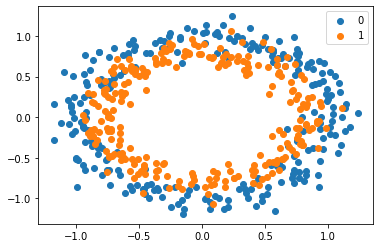

In [ ]:
for i in range(2):
    samples_ix = where(trainy == i)
    pyplot.scatter(trainX[samples_ix, 0], trainX[samples_ix, 1], label=str(i))
pyplot.legend()
pyplot.show()

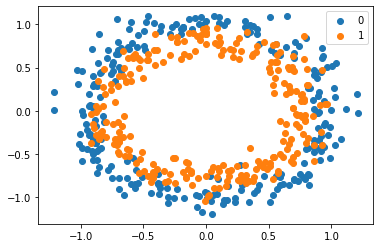

In [ ]:
for i in range(2):
    samples_ix = where(testy == i)
    pyplot.scatter(testX[samples_ix, 0], testX[samples_ix, 1], label=str(i))
pyplot.legend()
pyplot.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(trainX, trainy)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(trainX, trainy)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(testX, testy)))

Accuracy of Logistic regression classifier on training set: 0.54
Accuracy of Logistic regression classifier on test set: 0.46


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(trainX, trainy)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(trainX, trainy)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(testX, testy)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.76


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(trainX, trainy)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(trainX, trainy)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(testX, testy)))

Accuracy of K-NN classifier on training set: 0.85
Accuracy of K-NN classifier on test set: 0.82


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import BatchNormalization


In [ ]:
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(50, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0)

In [ ]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


Train: 0.848, Test: 0.852


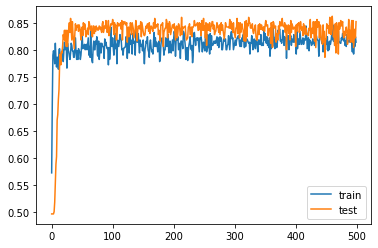

In [ ]:
# plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

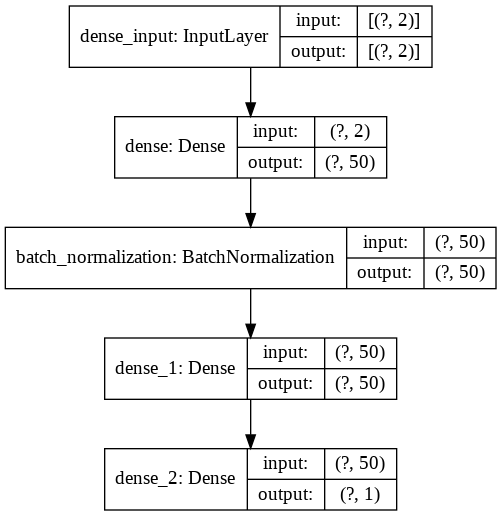

In [ ]:
from keras.utils import plot_model
plot_model(model,show_layer_names=True, show_shapes=True)